## NamastePymc3 examples

All this code leans hevily on Dan Foreman-Mackey's exoplanet project (http://github.com/dfm/exoplanet), specifically the K2-3 example.

In [1]:
# Importing the important things:

import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import pymc3 as pm


In [2]:
from stellar import starpars

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
import NamastePymc3 as namaste

# TESS example: TIC 128703021

Running on a TESS example, TIC128703021 (this will download the lightcurve).

The inputs here are:
* list of: initial depths (600ppm)
* list of: initial t0s (1601.85)
* stellar dictionary with stellar radius, density, Teff and logg (from spctra/Gaia DR2 in this case)
* We specify the mission
* We LoadFromFile (works if there is already a pickled Pymc3 output present - if not, run from scratch)

TESS file


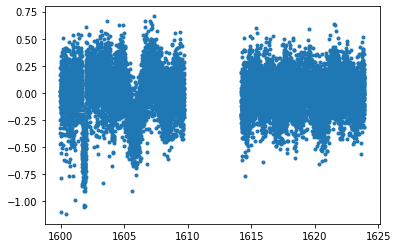

In [21]:
#Here is the lightcurve:
plt.figure(2)
lc,hdr=namaste.TESS_lc(128703021)
plt.plot(lc['time'],lc['flux'],'.')

In [12]:
dict_out=namaste.Run(128703021, [600e-6], [1601.85],
                        stellardict={'Rs':1.54,'Rs_err':0.18,
                                     'rho_s':0.34872195*1.408,'rho_s_err':(0.08052529*1.408, 0.11735043*1.408),
                                     'Teff':6216,'Teff_err':100,
                                     'logg':4.16,'logg_err':0.12},
                        mission='TESS',LoadFromFile=False,cutDistance=10,n_draws=500)

TESS file
Initialising transit model
[1599.95737721 1599.95876614 1599.96432184 ... 1623.89371288 1623.89510176
 1623.89649063] <class 'numpy.ndarray'> <class 'numpy.float64'>
Teff: [6216  100  100]
119.99544021557205 [ 7.8492441   8.09955414  8.34986418  8.60017422  8.85048427  9.10079431
  9.35110435  9.60141439  9.85172444 10.10203448 10.35234452 10.60265456
 10.85296461 11.10327465 11.35358469 11.60389473 11.85420478 12.10451482
 12.35482486 22.04649063]
6951 points cut from lightcurve leaving 6898 to process
Using minimum period(s) of: [7.8492441]
contrain LDs -  6216 100 4.16 0.12 0.0 1200 [0.33857328 0.21664467] [0.05 0.05]
Rs __str__ = [1.54]
RpRs __str__ = [0.0244949]
u_star __str__ = [0.33857328 0.21664467]
r_pl __str__ = [0.03772214]
[7.8492441] t0 [1599.95737721 1599.95876614 1599.96432184 1599.96571077 1599.96987754
 1599.97126647 1599.97265539 1599.97404432 1599.97543324 1599.97960002] 0.0013889181013837515


optimizing logp for variables: [rb]
23it [00:22,  1.04it/s, logp=-2.008112e+03] 
message: Optimization terminated successfully.
logp: -2137.9211417544198 -> -2008.1123309039185
optimizing logp for variables: [logs2]
75it [00:01, 44.09it/s, logp=8.608619e+02] 
message: Desired error not necessarily achieved due to precision loss.
logp: -2008.1123309039194 -> 860.8619273469029
optimizing logp for variables: [t0, P_index]
180it [00:02, 74.68it/s, logp=8.682527e+02] 
message: Desired error not necessarily achieved due to precision loss.
logp: 860.8619273469011 -> 868.2527054196258
optimizing logp for variables: [logpower, logs2]
12it [00:02,  4.27it/s, logp=8.682620e+02] 
message: Optimization terminated successfully.
logp: 868.252705419624 -> 868.2619707510943
optimizing logp for variables: [logw0]
12it [00:01,  6.16it/s, logp=1.011188e+03] 
message: Optimization terminated successfully.
logp: 868.2619707510943 -> 1011.1881623839938
optimizing logp for variables: [logpower, logw0, logs2, 

logrho_S               0.34
Rs                     0.80
mean                  -0.92
t0                    -0.92
P_index_logodds__     -7.27
rb_radiusimpact__     -3.91
ecc_interval__        -1.47
omega_angle__         -0.50
u_star_interval__      0.88
logs2_interval__      -1.39
logw0_interval__      -1.39
logpower_interval__   -1.39
Name: Log-probability of test_point, dtype: float64
Model loaded


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [logpower, logw0, logs2, u_star, omega, ecc, rb, P_index, t0, mean, Rs, logrho_S]
Sampling 4 chains: 100%|██████████| 3320/3320 [21:22<00:00,  2.59draws/s]
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


769 ( 38 ) removed due to period gap cuts
13849 13849 6898 6898 6898 6898
0.8659436998710579 0.2962013423426504 1.8910873848361287 6.384465951030326
varnames =  ['b', 'ecc', 'period', 'r_pl', 'u_star', 'vrel']


varnames =  ['b', 'ecc', 'logp', 'r_pl', 'u_star', 'vrel']


<Figure size 432x288 with 0 Axes>

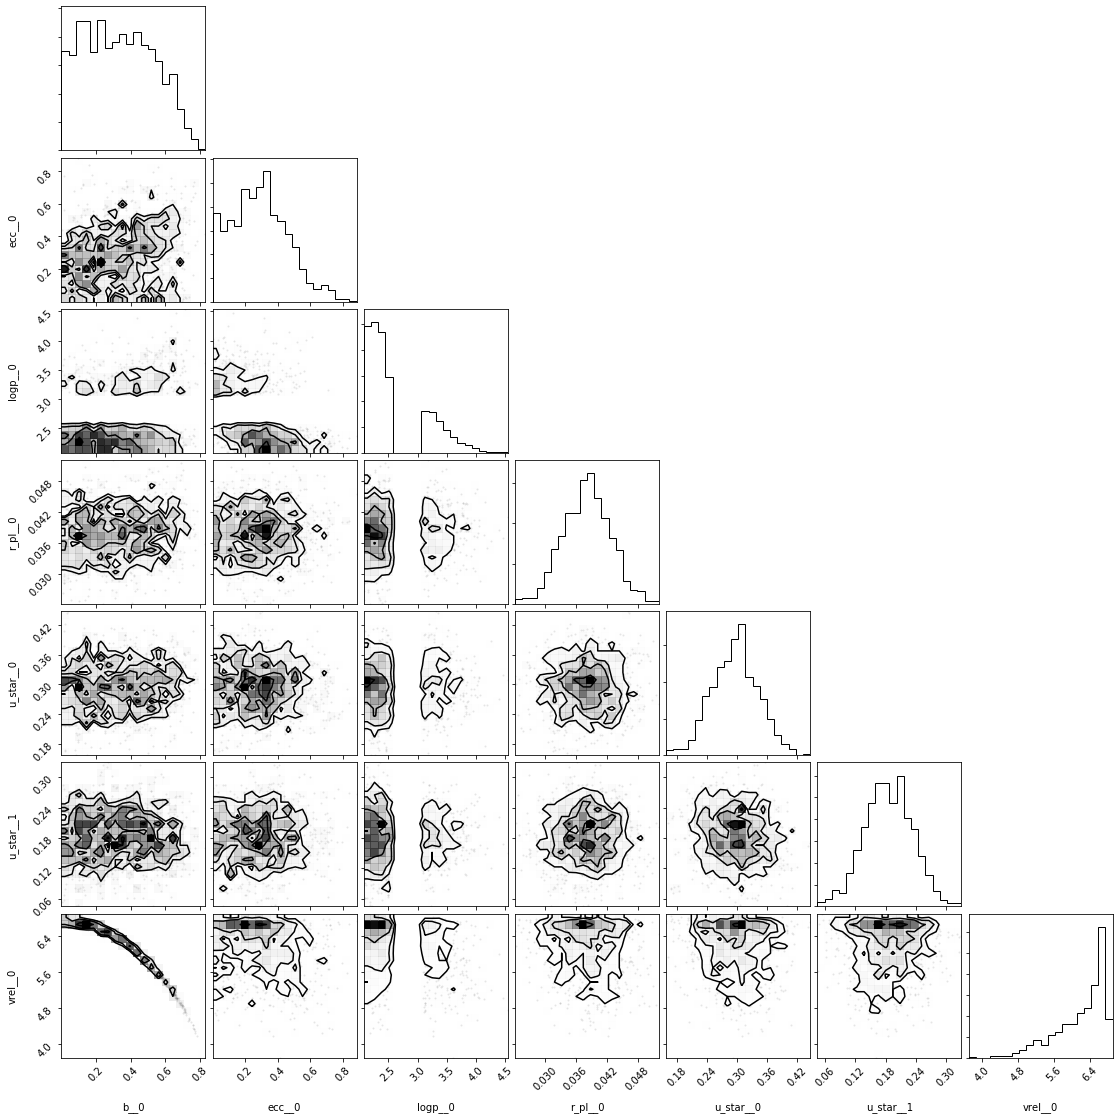

In [23]:
namaste.PlotCorner(dict_out['trace'],128703021, mission='TESS',tracemask=dict_out['tracemask'],varnames=['b', 'ecc', 'logp', 'r_pl', 'u_star', 'vrel'])



In [16]:
namaste.PlotLC(dict_out['light_curve'], dict_out['trace'], 128703021, mission='TESS',tracemask=dict_out['tracemask'])



AssertionError: 

varnames =  ['logS0', 'logw0', 'logs2', 'logpower']


<Figure size 432x288 with 0 Axes>

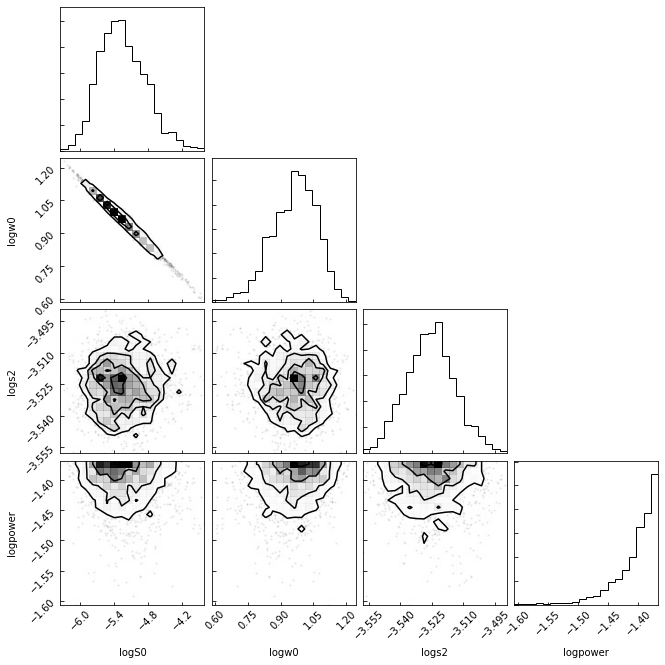

In [19]:
namaste.PlotCorner(dict_out['trace'], 248847494, mission='K2',varnames=["logS0", "logw0", "logs2", "logpower"])


0.039810717055349734

In [24]:
print("running")

running


# K2 example: EPIC 248847494

As above. With added keywords:
* `initdur` is a list of initial durations. This is needed here as the inital fits are poor due to the extreme long duration of this object.
* `cutDistance` - how far from the transit to cut the lightcurve (in order to speed up processing)
* `overwrite` - overwrites files
* `doplots` - Whether to output & save plots of transit and corner

In [ ]:
out_dict_k2=namaste.Run(248847494, [1.5e-3], [3134.3],
                        stellardict={'Rs':2.70,'Rs_err':0.12,
                                     'rho_s': 0.064,'rho_s_err':0.007,
                                     'Teff':4898,'Teff_err':68,
                                     'logg':3.52,'logg_err':0.1},doplots=True,
                        mission='K2',cutDistance=5.0,overwrite=True,initdur=[2.1],
                        n_draws=500,constrain_LD=True)

DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): exofop.ipac.caltech.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://exofop.ipac.caltech.edu:443 "GET /k2/download_target.php?id=248847494 HTTP/1.1" 200 4433
K2 campaigns to search: 14
INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 248847494.
Initialising transit model
[3072.72831697 3072.74874933 3072.76918168 ... 3152.37160894 3152.39204067
 3152.41247259] <class 'numpy.ndarray'> <class 'numpy.float64'>
Teff: [4898   68   68]
1103.2130095064515 [61.57168303]
Using minimum period(s) of: [61.57168303]
contrain LDs -  4898 68 3.52 0.1 0.0 1200 [0.44545451 0.20364499] [0.05 0.05]
Rs __str__ = [2.7]
RpRs __str__ = [0.03872983]
u_star __str__ = [0.44545451 0.20364499]
r_pl __str__ = [0.10457055]
[61.57168303] t0 [3072.72831697 3072.74874933 3072.76918168 3072.78961414 3072.81004639
 3072.83047875 3072.8509111  3072.87134345 3072.8917

Multiprocess sampling (4 chains in 4 jobs)


INFO  [pymc3.sample()]: Multiprocess sampling (4 chains in 4 jobs)


NUTS: [logpower, logw0, logs2, u_star, omega, ecc, rb, P_index, t0, mean, Rs, logrho_S]


INFO  [pymc3._print_step_hierarchy()]: NUTS: [logpower, logw0, logs2, u_star, omega, ecc, rb, P_index, t0, mean, Rs, logrho_S]


Sampling 4 chains: 100%|██████████| 3320/3320 [1:19:41<00:00,  1.70s/draws]    
The estimated number of effective samples is smaller than 200 for some parameters.


ERROR [pymc3.log_warning()]: The estimated number of effective samples is smaller than 200 for some parameters.
2  removed due to period gap cuts
3851 3851 3851 3851 3851 3851
2.2103809326259882 2.0294834713348493 1.916164462637984 0.9441636207944417
varnames =  ['b', 'ecc', 'period', 'r_pl', 'u_star', 'vrel']


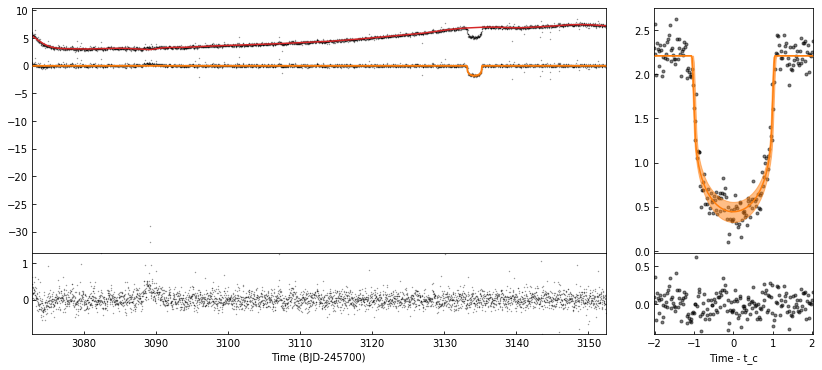

<Figure size 432x288 with 0 Axes>

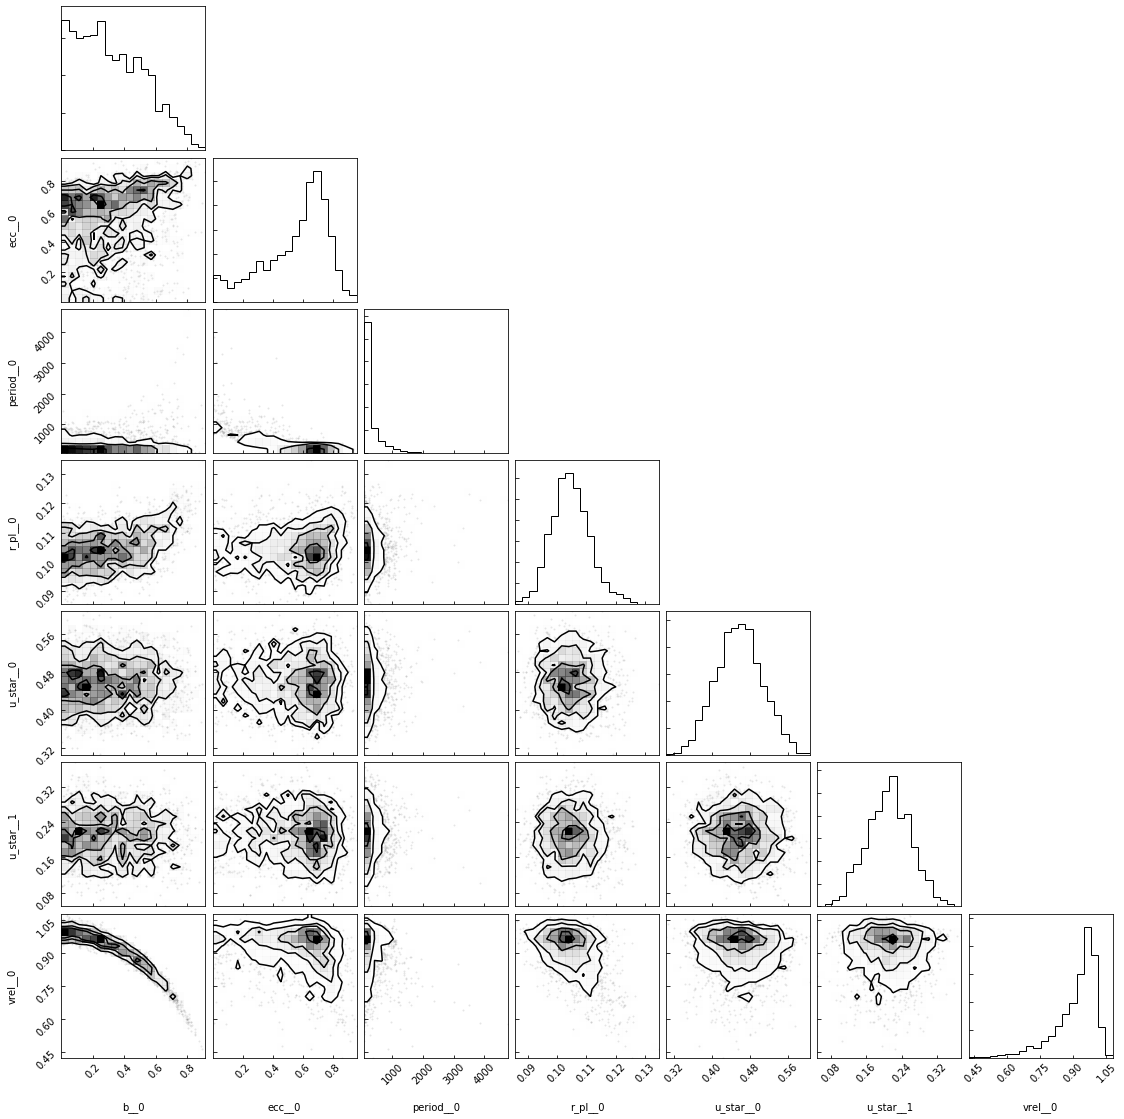

In [ ]:
out_dict_k2=namaste.Run(248847494, [1.5e-3], [3134.3],
                        stellardict={'Rs':2.70,'Rs_err':0.12,
                                     'rho_s': 0.064,'rho_s_err':0.007,
                                     'Teff':4898,'Teff_err':68,
                                     'logg':3.52,'logg_err':0.1},doplots=True,
                        mission='K2',cutDistance=5.0,overwrite=True,initdur=[2.1],
                        n_draws=500,constrain_LD=True)

[autoreload of NamastePymc3 failed: Traceback (most recent call last):
  File "/Users/hosborn/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ModuleNotFoundError: No module named 'isoclassify.isoclassify'
]


loading from /Users/hosborn/Postdoc/NamastePymc3/KIC00008410697/KIC00008410697_2019-11-19_0.lc


NameError: name 'getStellarInfo' is not defined

#### We can plot specific corner plots too with `PlotCorner`

varnames =  ['logS0', 'logw0', 'logs2', 'logpower']


<Figure size 432x288 with 0 Axes>

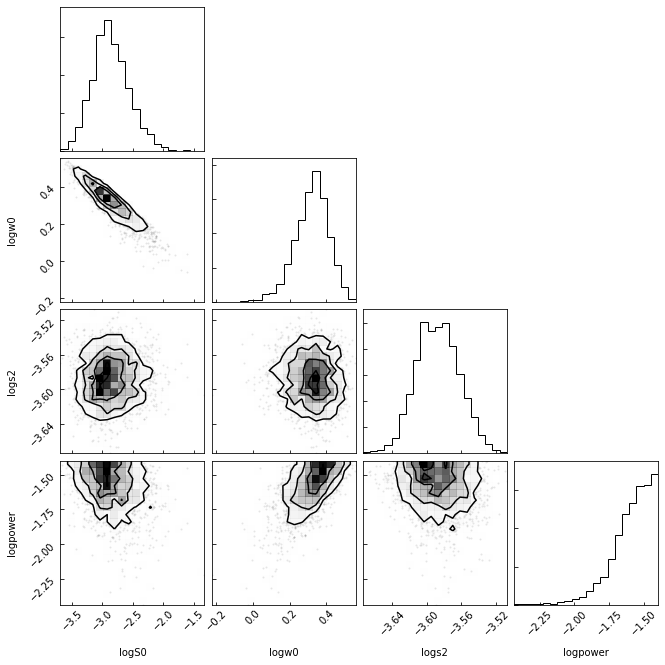

In [29]:
namaste.PlotCorner(out_dict_k2['trace'], 248847494, mission='K2',varnames=["logS0", "logw0", "logs2", "logpower"])
#namaste.PlotCorner(trace, 248847494, mission='K2',varnames=["b", "ecc", "omega", "logp", "r_pl","u_star","vrel"])

varnames =  ['logS0', 'logw0', 'logs2', 'logpower']


<Figure size 432x288 with 0 Axes>

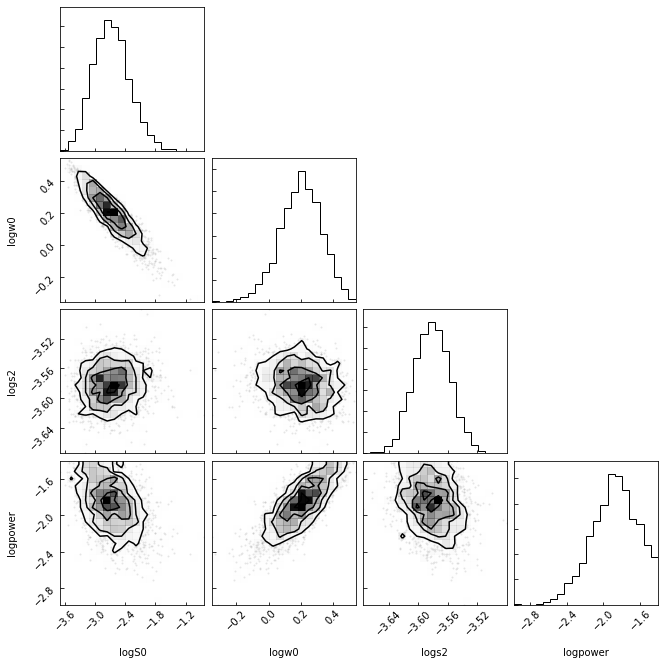

In [31]:
namaste.PlotCorner(out_dict_k2['trace'], 248847494, mission='K2',varnames=["logS0", "logw0", "logs2", "logpower"])
#namaste.PlotCorner(trace, 248847494, mission='K2',varnames=["b", "ecc", "omega", "logp", "r_pl","u_star","vrel"])

varnames =  ['logS0', 'logw0', 'logs2', 'logpower']


<Figure size 432x288 with 0 Axes>

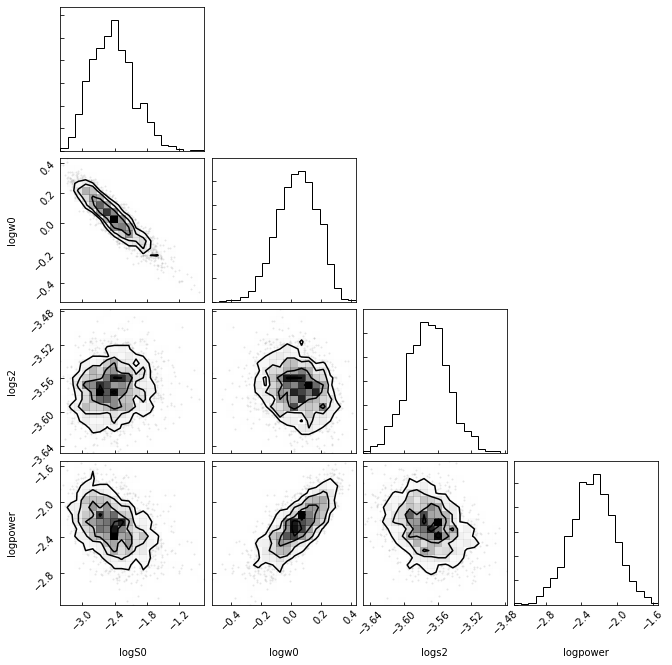

In [33]:
namaste.PlotCorner(out_dict_k2['trace'], 248847494, mission='K2',varnames=["logS0", "logw0", "logs2", "logpower"])


varnames =  ['logS0', 'logw0', 'logs2', 'logpower']


<Figure size 432x288 with 0 Axes>

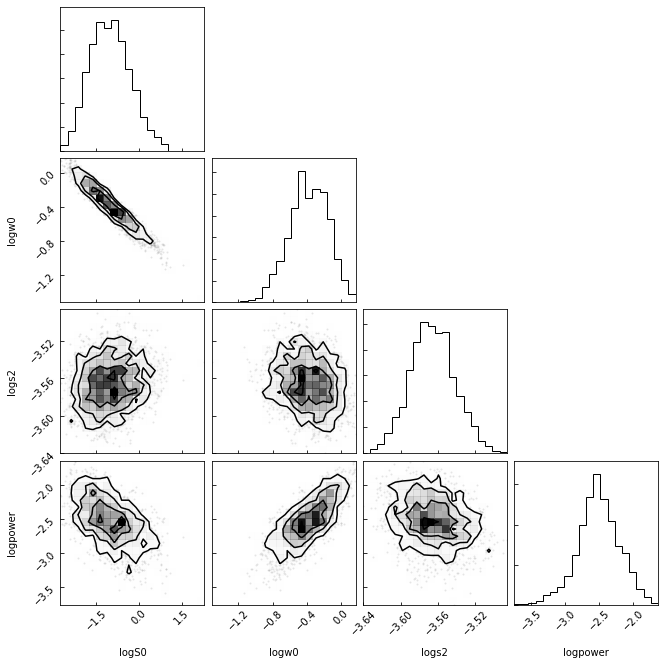

In [38]:
namaste.PlotCorner(out_dict_k2['trace'], 248847494, mission='K2',varnames=["logS0", "logw0", "logs2", "logpower"])

varnames =  ['logS0', 'logw0', 'logs2', 'logpower']


<Figure size 432x288 with 0 Axes>

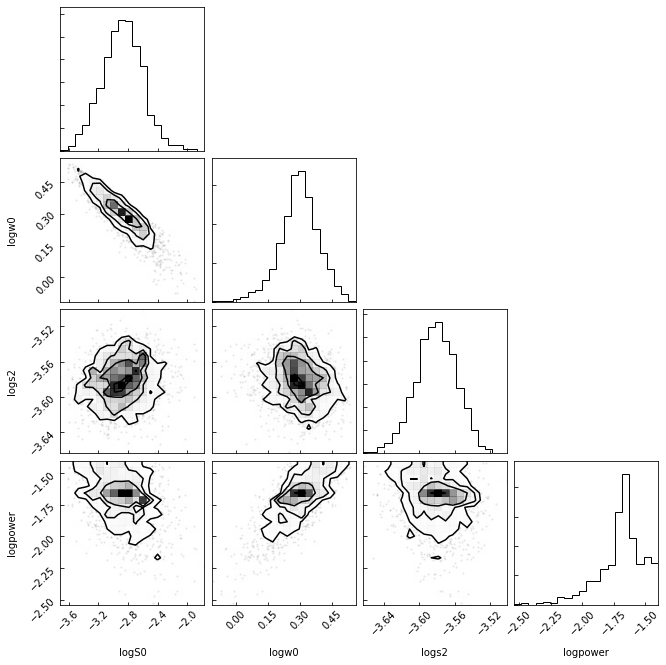

In [43]:
namaste.PlotCorner(out_dict_k2['trace'], 248847494, mission='K2',varnames=["logS0", "logw0", "logs2", "logpower"])

varnames =  ['logS0', 'logw0', 'logs2', 'logpower']


<Figure size 432x288 with 0 Axes>

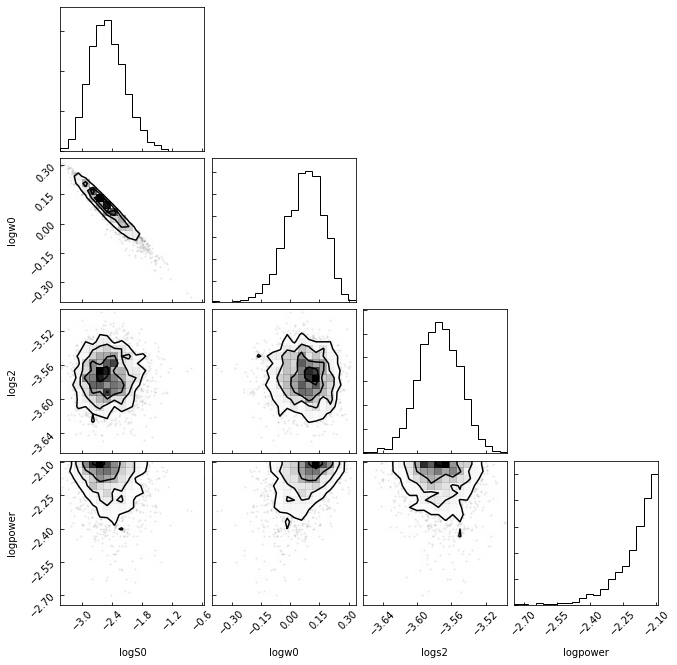

In [46]:
namaste.PlotCorner(out_dict_k2['trace'], 248847494, mission='K2',varnames=["logS0", "logw0", "logs2", "logpower"])

varnames =  ['logS0', 'logw0', 'logs2', 'logpower']


<Figure size 432x288 with 0 Axes>

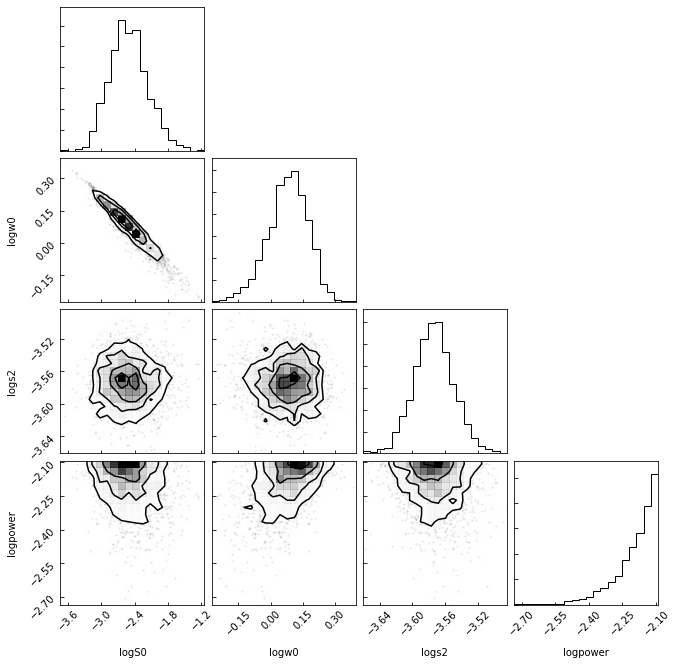

In [51]:
namaste.PlotCorner(out_dict_k2['trace'], 248847494, mission='K2',varnames=["logS0", "logw0", "logs2", "logpower"])

varnames =  ['logS0', 'logw0', 'logs2', 'logpower']


<Figure size 432x288 with 0 Axes>

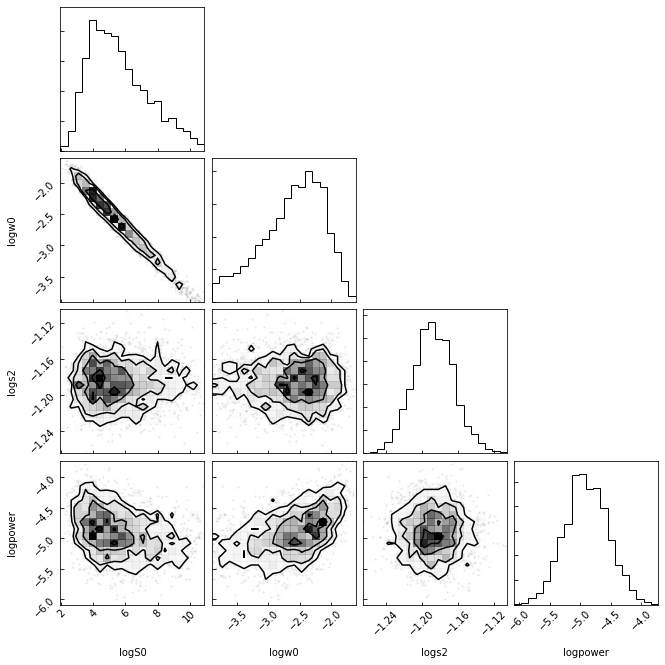

In [53]:
namaste.PlotCorner(out_dict_k2['trace'], 248847494, mission='K2',varnames=["logS0", "logw0", "logs2", "logpower"])

# KIC8410697 (from Foreman-Mackey et al, 2016)

A Kepler example now.
Again we include an initial duration, as well as the necessary initial depth and t0.

In [ ]:
out_dict_kep=namaste.Run(8410697, [5.5e-3], [542.1231],
                         stellardict={'Rs':1.003,'Rs_err':0.23,
                                      'rho_s': 1.201,'rho_s_err':0.7,
                                      'Teff':5918,'Teff_err':160,
                                      'logg':4.371,'logg_err':0.16},doplots=True,
                         mission='Kepler',cutDistance=5.0,initdur=[19.77/24.0])

# TBD:

## Let's try the 5-planet HIP 41378 system...

This is slightly more awkward as we have two campaigns and many possible "islands" in the period space...
What would be nice is if we could cut out the two transits in C16 data and overlay them with the earlier data, thereby fitting a period from the overlaid transits and a second time offset which can be used to give integer period positions.

In [150]:
mod,trace,lc=namaste.Run(211311380, [400e-6,320e-6,700e-6,1400e-6,5500e-6,700e-6,5500e-6],
                         [2319.283,2330.162,2333.273,2309.020,2353.9162,(2333.273+278.360*4),(2353.9162+542.0793*2)],
                         periods=[5.71493,31.6978,0.0,0.0,0,0,0,0],
                         initdur=[0.0,0.0,13/24.0,14.5/24.0,22/24.0,13/24.0,22/24.0],
                         stellardict={'Rs':1.3,'Rs_err':0.009,
                                     'rho_s': 0.785,'rho_s_err':0.008,
                                     'Teff':6290,'Teff_err':77,
                                     'logg':4.29,'logg_err':0.004},doplots=False,
                         mission='K2',cutDistance=2.5,n_draws=1000,LoadFromFile=True)

Initialising transit model
Teff: [6290   77   77]
1 48.15878780414732
[4.2861975, 23.77335, 48.15878780414732]
242.2539182012057 48.15878780414732
1 72.41178780414748
[4.2861975, 23.77335, 48.15878780414732, 72.41178780414748]
323.6788856496838 72.41178780414748
1 47.30558973678171
[4.2861975, 23.77335, 48.15878780414732, 72.41178780414748, 47.30558973678171]
999.7000691646358 47.30558973678171
1 28.14641135280226
[4.2861975, 23.77335, 48.15878780414732, 72.41178780414748, 47.30558973678171, 28.14641135280226]
242.2539182012057 28.14641135280226
1 31.305763086364095
[4.2861975, 23.77335, 48.15878780414732, 72.41178780414748, 47.30558973678171, 28.14641135280226, 31.305763086364095]
999.7000691646358 31.305763086364095
[0.3288645  0.22105668] [0.05 0.05]
Rs __str__ = [1.3]
RpRs __str__ = [0.02       0.01788854 0.02645751 0.03741657 0.07416198 0.02645751
 0.07416198]
u_star __str__ = [0.5 0.5]
r_pl __str__ = [0.026      0.02325511 0.03439477 0.04864155 0.09641058 0.03439477
 0.09641058]


In [149]:
namaste.PlotCorner(trace, "211311380",mission='K2')

varnames =  ['b', 'ecc', 'period', 'r_pl', 'u_star', 'vrel']


<Figure size 432x288 with 0 Axes>

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


 GAP IN X OF  3616
3314 3314 3314 3314
5972 5447 5447
0.09678845153182625 0.49192557186178376 1.7817378581921728 3.621966330086998
0.3408564428576677 0.4911737271595013 1.7782240936886462 3.6203566993948653
1.2374771193885552 0.4920343711850595 1.7797114135170924 3.61704693359262
3.142845199227487 0.492574421789631 1.7816705536389894 3.6170586104852727
9.520406072474827 0.4934798877768224 1.7844045058875124 3.6159619674196612
9.988881066618285 0.4930186486914814 1.7818970484145595 3.6142589193002834
16.33961557437759 0.4928553526681401 1.781013915112098 3.6136645477630194


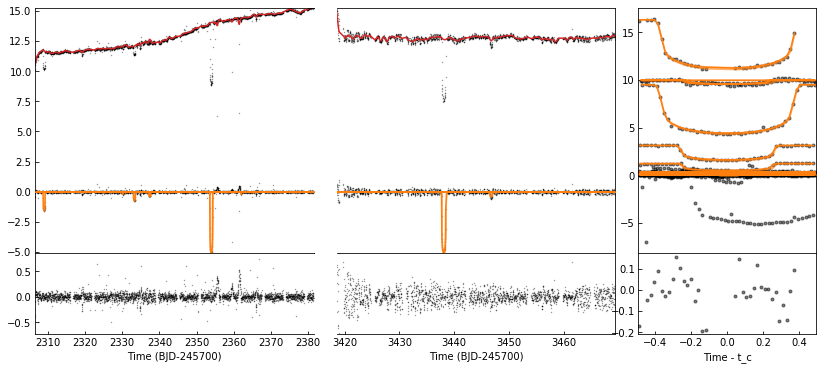

In [200]:
namaste.PlotLC(lc[:,:3],trace, "211311380",mission='K2',lcmask=lc[:,3].astype(bool),overwrite=True)

In [153]:
len(lc)

5972

In [157]:
len(trace["light_curves"][2,:].ravel())

38129

In [ ]:
pred = trace["light_curves"]

In [156]:
38129/5447

7.0

In [159]:
onepl_mod,onepl_trace,onepl_lc=namaste.Run(8410697, [5.5e-3], [542.1231],
                                        stellardict={'Rs':1.003,'Rs_err':0.23,
                                                     'rho_s': 1.201,'rho_s_err':0.7,
                                                     'Teff':5918,'Teff_err':160,
                                                     'logg':4.371,'logg_err':0.16},doplots=False,
                                        mission='Kepler',cutDistance=5.0,initdur=[19.77/24.0],LoadFromFile=True)

Initialising transit model
Teff: [5918  160  160]


INFO (theano.gof.compilelock): Refreshing lock /Users/hosborn/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.6.1-64/lock_dir/lock


28 189.7261506698444
[189.7261506698444]
1109.928590027925 189.7261506698444
INFO  [theano.gof.compilelock._get_lock()]: Refreshing lock /Users/hosborn/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.6.1-64/lock_dir/lock
[0.34851501 0.21932926] [0.05 0.05]
Rs __str__ = [1.003]
RpRs __str__ = [0.07416198]
u_star __str__ = [0.5 0.5]
r_pl __str__ = [0.07438447]
[189.72615067] t0 [537.14118877 537.18205683 537.20249072 537.2229247  537.24335878
 537.26379266 537.28422665 537.30466073 537.32509461 537.34552859] 0.02043392084306106
optimizing logp for variables: ['rb_radiusimpact__']
message: Optimization terminated successfully.
logp: -620.8558013593382 -> -596.2529013336166
optimizing logp for variables: ['logs2']
message: Optimization terminated successfully.
logp: -596.2529013336166 -> -20.143640772074853
optimizing logp for variables: ['t0', 'P_index_logodds__']
message: Desired error not necessarily achieved due to precision loss.
logp: -20.14364077207599 -> -10.7015485352643